# 2D Classification
- distinguish side and top views in T20S

In [1]:
%cd ~/repos/pyem/
from pyem import mrc

/Users/gw/repos/pyem


In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam, SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [4]:
fname='/Users/gw/Documents/education/2018w/ece1512/project/P11/templates_selected.mrc'
template = mrc.read(fname=fname)

In [11]:
template.shape

(128, 128)

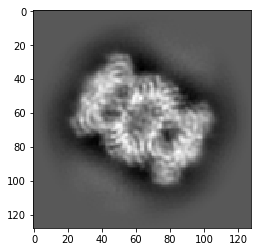

In [10]:
plt.imshow(template,cmap='gray')

/Users/gw/miniconda2/envs/ece1512/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


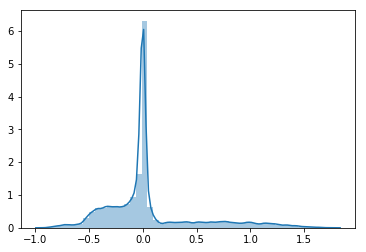

In [20]:
sns.distplot(template.flatten())

In [5]:
fname = '/Users/gw/Documents/education/2018w/ece1512/project/P11/J16/localmotioncorrected/14sep05c_c_00007gr_00021sq_00017hl_00002es.frames_particles_local_aligned.mrc'
stack = mrc.read(fname)
stack.shape

(400, 400, 716)

### swapping axes. 
swap (x,y,z) to (z,x,y) with np.swapaxis 01 then 02

In [6]:
xwant = np.zeros((2,3,4))
xwant[0,:,:] = np.arange(3*4).reshape(3,4)
xwant[1,:,:] = 10*np.arange(3*4).reshape(3,4)
xwant

array([[[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.]],

       [[  0.,  10.,  20.,  30.],
        [ 40.,  50.,  60.,  70.],
        [ 80.,  90., 100., 110.]]])

In [59]:
xhave = np.zeros((3,4,2))
xhave[:,:,0] = np.arange(3*4).reshape(3,4)
xhave[:,:,1] = 10*np.arange(3*4).reshape(3,4)
xhave

array([[[  0.,   0.],
        [  1.,  10.],
        [  2.,  20.],
        [  3.,  30.]],

       [[  4.,  40.],
        [  5.,  50.],
        [  6.,  60.],
        [  7.,  70.]],

       [[  8.,  80.],
        [  9.,  90.],
        [ 10., 100.],
        [ 11., 110.]]])

In [68]:
xhave.swapaxes(0,1).swapaxes(0,2)

array([[[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.]],

       [[  0.,  10.,  20.,  30.],
        [ 40.,  50.,  60.,  70.],
        [ 80.,  90., 100., 110.]]])

# Train, test, validation split

In [7]:
o_x_train = stack.swapaxes(0,1).swapaxes(0,2)

o_y_train = np.random.randint(low=0,high=2+1,size=stack.shape[-1])

x_train, x_val, y_train, y_val = train_test_split(o_x_train, o_y_train,
                                                  test_size=0.1,
                                                  random_state=20)

In [8]:

x_train, x_val, y_train, y_val = train_test_split(o_x_train, o_y_train,
                                                  test_size=0.1,
                                                  random_state=20)

y_train_targ = pd.get_dummies(y_train)
y_val_targ = pd.get_dummies(y_val)

x_train = x_train[:,:,:,np.newaxis]
x_val = x_val[:,:,:,np.newaxis]


print('The Training set images have this shape: ' + str(x_train.shape))
print('The Training set labels have this shape: ' + str(y_train_targ.shape))
print('The Validation set images have this shape: ' + str(x_val.shape))
print('The Validation set labels have this shape: ' + str(y_val_targ.shape))

The Training set images have this shape: (644, 400, 400, 1)
The Training set labels have this shape: (644, 3)
The Validation set images have this shape: (72, 400, 400, 1)
The Validation set labels have this shape: (72, 3)


In [ ]:
# Fit and evaluate model

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(4, kernel_size=(3,3), input_shape=x_train.shape[1::], activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
n_classes = np.unique(o_y_train.tolist()).size
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.fit(x_train, y_train_targ.values, epochs=10, batch_size=int(x_train.shape[0]/100))


scores = model.evaluate(x_val, y_val_targ.values)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 398, 398, 4)       40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 199, 199, 4)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 197, 197, 4)       148       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4917376   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total para